# Tracé de cartes choroplèthes avec plotly

Un outil pratique pour afficher des grandeurs sur des cartes : par département, par canton, par pays...
L'exemple ci-dessous donne le principe d'utilisation de `plotly`.

In [19]:
# les imports
import plotly.express as px
import matplotlib.pyplot as plt
import geojson
import pandas as pd 
import numpy as np

# je telecharge le geojson qui m'interesse sur ce super site :
# https://france-geojson.gregoiredavid.fr/repo/departements.geojson
# il y a differents niveaux de detail (canton, commune, etc.) à vous de choisir le niveau de finesse
fichier_gjson ="./src/departements.geojson"

print("Lecture geojson...")
with open(fichier_gjson) as f:
    la_carte = geojson.load(f)

# ensuite chaque département est donné avec un polygone qui trace ses frontieres et un "code" 
# qui est caché dans le fichier .geojson après chaque polygone (faites un CTRL+F pour voir)
# on fait donc une liste avec tous ces codes et on la met dans un dataframe
departement_codes = [feature['properties']['code'] for feature in la_carte['features']]
df = pd.DataFrame({
    'code': departement_codes,
    'valeur': np.random.rand(len(departement_codes))  # Random data for visualization
})

    
# ensuite on se sert de plotly.express pour la carte choroplethe :
fig = px.choropleth(df, 
                    geojson=la_carte, 
                    locations='code', # la colonne dans le df avec les codes de departement
                    color='valeur', # la colonne du df avec la valeur à afficher
                    featureidkey="properties.code",# on fait le lien la carte<-> dataframe : correspondance "codes" avec la "location" sur la carte
                    scope="europe")

# on met le focus sur la france en se servant des coordonnees dans "locations"
fig.update_geos(fitbounds="locations", visible=False)
fig.show()



Lecture geojson...


# (en option) Tracé de cartes choroplèthes avec geopandas

Un outil pratique pour afficher des grandeurs sur des cartes : par département, par canton, par pays...
L'exemple ci-dessous donne le principe d'utilisation de `geopandas` et `geoplot`

Lecture...


<AxesSubplot:>

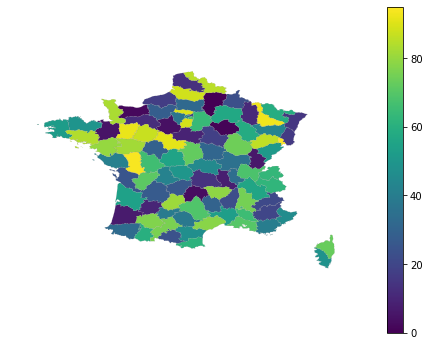

In [2]:
# les imports
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt
import numpy as np


# je telecharge le geojson qui m'interesse sur ce super site :
# https://france-geojson.gregoiredavid.fr/repo/departements.geojson
# il y a differents niveaux de detail (canton, commune, etc.) à vous de choisir le niveau de finesse
fichier_gjson ="./src/departements.geojson"


print("Lecture...")
geoData= gpd.read_file(fichier_gjson)

# ensuite on remplit la donnee, ici dans l'ordre d'arrivée des 
geoData["donnee"] = np.arange(0,len(geoData))

# on met la donnée sous la forme qui va bien pour pouvoir tracer
geoData2 = geoData.explode(index_parts=True).reset_index()

# carte choroplèthe https://fr.wikipedia.org/wiki/Carte_choropl%C3%A8the
carte=gplt.choropleth(geoData2,
                 hue="donnee",
                 cmap='viridis',
                   linewidth=.1,
                   legend=True,
                   edgecolor='grey')
carte.plot()
plt.show()

À vous de jouer sur les applications que vous avez choisies : récupérez la densité de population par commune, le PIB, ou tout autre scalaire et affichez la valeur sur votre carte...